# [MidExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, April 28, 2022.**

**Student Name**  : Aurellia Vieryn  
**Student ID**    : 2440066626   

***Task:***   
**You are required to build `the best` multiclass classifier for the `studentsprofile` dataset**   
Your objectives are to:     
o Conduct a thorough exploratory data analysis (using graphs, statistical test, etc. and a verbal analysis)   
o Build `multiple potentially suitable classification models` (at least 2 different machine learning models).    
`For example:`  By using different attributes or proportion for training and testing set or machine learning algorithms for each model or other schemas.       
o Choose what you assume to be the `"best"` model from these models for a final submission   

### 1. Data Description   
The dataset was collected from a online educational platform that show students developer profile.   
The dataset contains the following columns:  

`USERID`                        - ID for each student   
`HDS(HOURSDATASCIENCE)`         - Numbers of hours studied data science courses   
`HBE(HOURSBACKEND)`             - Numbers of hours studied web (Back-End)   
`HFE(HOURSFRONTEND)`            - Numbers of hours studied web (Front-End)     
`NUMCOURSESBEGINNERDATASCIENCE` - Numbers of beginner courses of Data Science completed by the student    
`NUMCOURSESBEGINNERBACKEND`     - Numbers of beginner courses of Web (Back-End) completed by the student   
`NUMCOURSESBEGINNERFRONTEND`    - Numbers of beginner courses of Web (Front-End) completed by the student   
`NUMCOURSESADVANCEDDATASCIENCE` - Numbers of advanced courses of Data Science completed by the student   
`NUMCOURSESADVANCEDBACKEND`     - Numbers of advanced courses of Web (Back-End) completed by the student   
`NUMCOURSESADVANCEDFRONTEND`    - Numbers of advanced courses of Web (Front-End) completed by the student   
`AVGSCOREDATASCIENCE`           - Average score in Data Science completed by the student   
`AVGSCOREBACKEND`               - Average score in Web (Back-End) completed by the student   
`AVGSCOREFRONTEND`              - Average score in Web (Front-End) completed by the student      
`StudentProfile`                - Tech profile of the students (beginner_front_end, advanced_front_end, beginner_back_end, advanced_back_end, beginner_data_science, advanced_data_science)   

In [1]:
# libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### (2% of points) - 2. Get the Data 

##### Apply data acquistion and give explanation on each output
Since the .csv file is located in the same folder as this jupyter notebook, we just need to simply input the file name and look at what seperator is being used.

In [2]:
student_profile = pd.read_csv("studentprofile.csv",sep=',')
student_profile.head()

,UserID,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND,StudentProfile
0,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


We can assume from the information we have that each user has a unique User ID, and 13 other attributes that differs from each user. We have already explained each columns before, so we wouldn't want to repeat it again. 

### (20% of points) - 3. Data Exploration

##### Apply data exploration, report the characteristics of your dataset (type of attributes & distribution, % of missing values, type of noise) and correlations between attributes (you may use statistical summaries and graphs), and write down your analysis and findings

In [3]:
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UserID                          20000 non-null  int64  
 1   HDS                             19986 non-null  float64
 2   HBE                             19947 non-null  float64
 3   HFE                             19984 non-null  float64
 4   NUMCOURSESBEGINNERDATASCIENCE   19974 non-null  float64
 5   NUMCOURSESBEGINNERBACKEND       19982 non-null  float64
 6   NUMCOURSESBEGINNERFRONTEND      19961 non-null  float64
 7   NUMCOURSESADVANCEDDATASCIENCE   19998 non-null  float64
 8   NUMCOURSESADVANCEDBACKEND       19992 non-null  float64
 9   NUMCOURSESADVANCEDFRONTEND      19963 non-null  float64
 10  AVGSCOREDATASCIENCE             19780 non-null  float64
 11  AVGSCOREBACKEND                 19916 non-null  float64
 12  AVGSCOREFRONTEND                

There exist 20000 instances (rows) in the dataset. As we can see, all 14 attributes contains numerical values (integer, float) except for `StudentProfile` which has categorical values (object). We wouldn't want to include `UserID` though because it must contains unique numbers.

In [4]:
student_profile['UserID'].nunique()

20000

We just proved that `UserID` indeed contains unique values. 

In [5]:
student_profile.describe()

,UserID,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND
count,2.000000e+04,19986.000000,19947.000000,19984.000000,19974.000000,19982.000000,19961.000000,19998.000000,19992.000000,19963.00000,19780.000000,19916.000000,19832.000000
mean,5.013036e+07,37.565296,43.552263,36.936599,3.698608,3.715144,4.048294,3.397140,4.344338,3.36783,65.070324,67.234535,67.130748
std,2.880690e+07,22.394805,22.387518,20.590381,2.001647,2.101863,2.296000,2.111437,2.161569,1.98784,13.950559,14.214591,14.446830
min,1.172000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,10.000000,0.000000
25%,2.534718e+07,21.000000,28.000000,22.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.00000,56.000000,58.000000,58.000000
50%,5.012472e+07,37.000000,43.000000,37.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.00000,65.000000,68.000000,68.000000
75%,7.513944e+07,53.000000,59.000000,51.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.00000,75.000000,77.000000,77.000000
max,9.999234e+07,127.000000,147.000000,124.000000,12.000000,12.000000,13.000000,13.000000,14.000000,12.00000,100.000000,100.000000,100.000000


We can also see the numerical column description in detail by using `.describe()`. The result shows that the number of courses column can be actually categorical values, seeing at how the maximum and the minimum are round numbers. Let's proceed to check them.

In [6]:
student_profile['NUMCOURSESBEGINNERDATASCIENCE '].nunique()

13

In [7]:
student_profile['NUMCOURSESBEGINNERBACKEND'].nunique()

13

In [8]:
student_profile['NUMCOURSESBEGINNERFRONTEND'].nunique()

14

In [9]:
student_profile['NUMCOURSESADVANCEDDATASCIENCE'].nunique()

14

In [10]:
student_profile['NUMCOURSESADVANCEDBACKEND '].nunique()

15

In [11]:
student_profile['NUMCOURSESADVANCEDFRONTEND'].nunique()

13

It seems that they are indeed categorical values, but since it's data types are all float, we don't need to change the data type again. Another thing we can see from the information result  is that there are a lot of missing values in the dataset. In that case, let's see the percentage of missing values per column.

In [12]:
percent_missing = student_profile.isnull().sum() * 100 / len(student_profile)
print(percent_missing)

UserID                            0.000
HDS                               0.070
HBE                               0.265
HFE                               0.080
NUMCOURSESBEGINNERDATASCIENCE     0.130
NUMCOURSESBEGINNERBACKEND         0.090
NUMCOURSESBEGINNERFRONTEND        0.195
NUMCOURSESADVANCEDDATASCIENCE     0.010
NUMCOURSESADVANCEDBACKEND         0.040
NUMCOURSESADVANCEDFRONTEND        0.185
AVGSCOREDATASCIENCE               1.100
AVGSCOREBACKEND                   0.420
AVGSCOREFRONTEND                  0.840
StudentProfile                    0.000
dtype: float64


In [13]:
student_profile.isnull().sum()

UserID                              0
HDS                                14
HBE                                53
HFE                                16
NUMCOURSESBEGINNERDATASCIENCE      26
NUMCOURSESBEGINNERBACKEND          18
NUMCOURSESBEGINNERFRONTEND         39
NUMCOURSESADVANCEDDATASCIENCE       2
NUMCOURSESADVANCEDBACKEND           8
NUMCOURSESADVANCEDFRONTEND         37
AVGSCOREDATASCIENCE               220
AVGSCOREBACKEND                    84
AVGSCOREFRONTEND                  168
StudentProfile                      0
dtype: int64

Of course there are missing values but we will deal with it on the data prepartion phase. We can continue with describing our data.

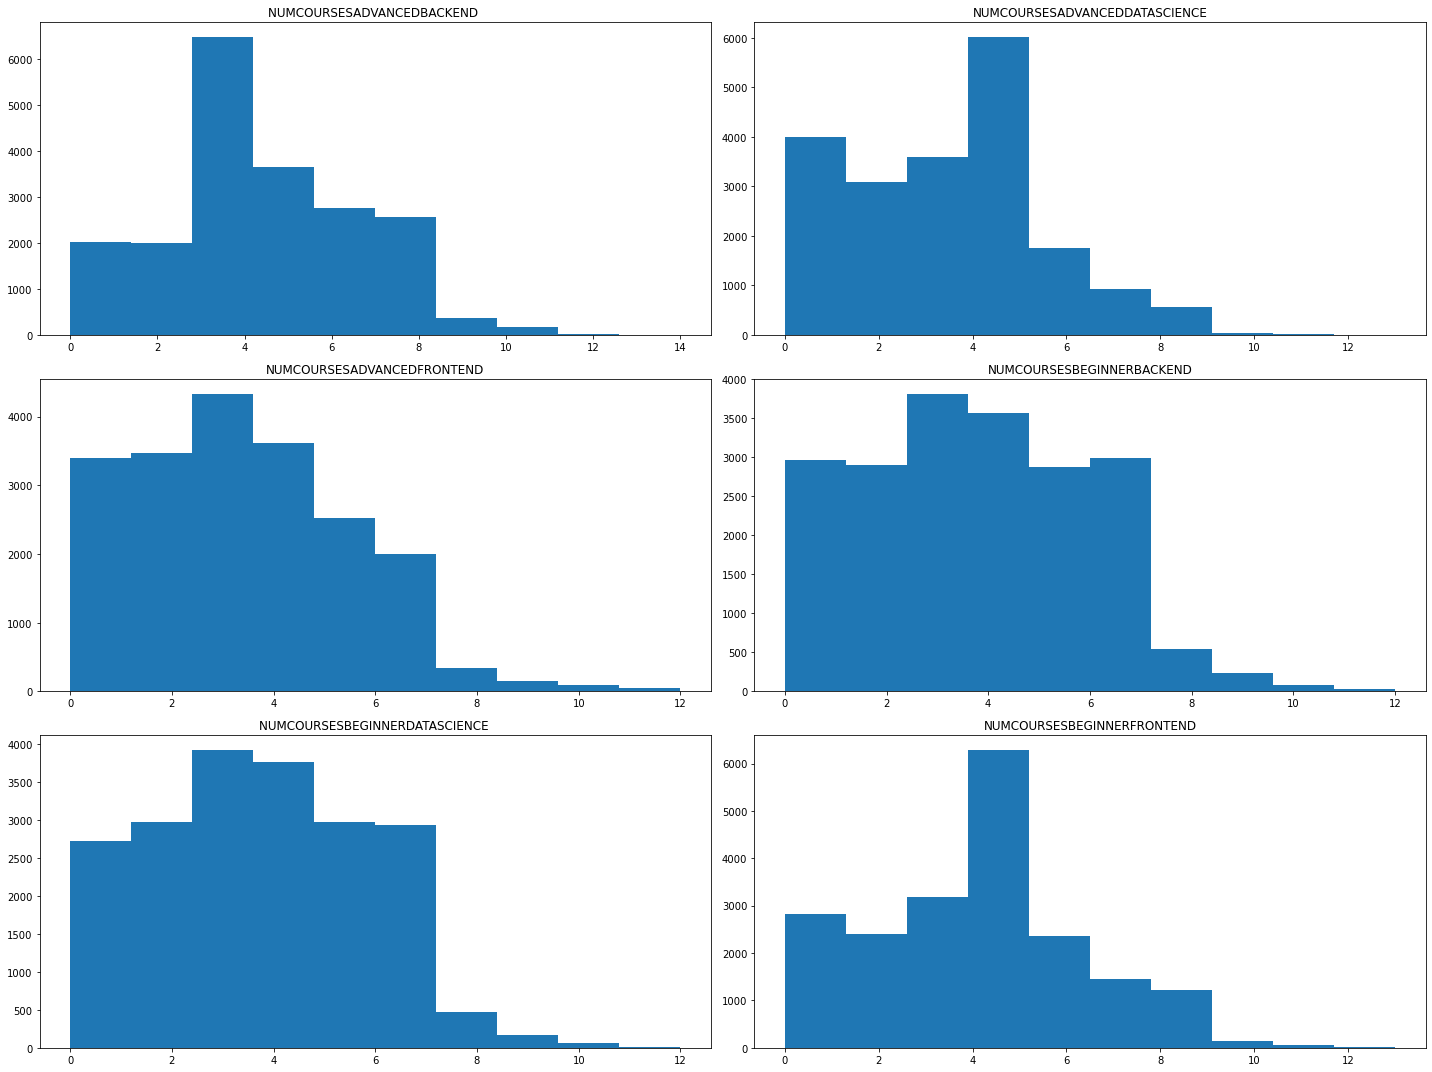

In [14]:
student_profile.hist(linewidth=1,figsize=(20,15),grid=0, column = ['NUMCOURSESBEGINNERDATASCIENCE ', 
                                                                         'NUMCOURSESBEGINNERBACKEND', 
                                                                         'NUMCOURSESBEGINNERFRONTEND',
                                                                         'NUMCOURSESADVANCEDDATASCIENCE',
                                                                         'NUMCOURSESADVANCEDBACKEND ',
                                                                         'NUMCOURSESADVANCEDFRONTEND'])
plt.tight_layout()

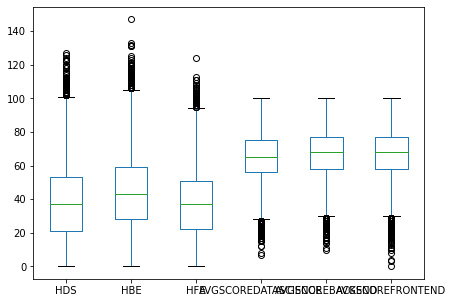

In [15]:
student_profile.boxplot(figsize=(7,5),grid=0, column = ['HDS','HBE','HFE',
                                                        'AVGSCOREDATASCIENCE',
                                                        'AVGSCOREBACKEND',
                                                        'AVGSCOREFRONTEND'])

The histograms above are plotted with x = columns values and y = number of values and we can see that the values varies between the columns. The boxplots have a lot of outliers, but we will just ignore it.<bs>
    
We also want to see the overall correlation between attributes in the dataset.

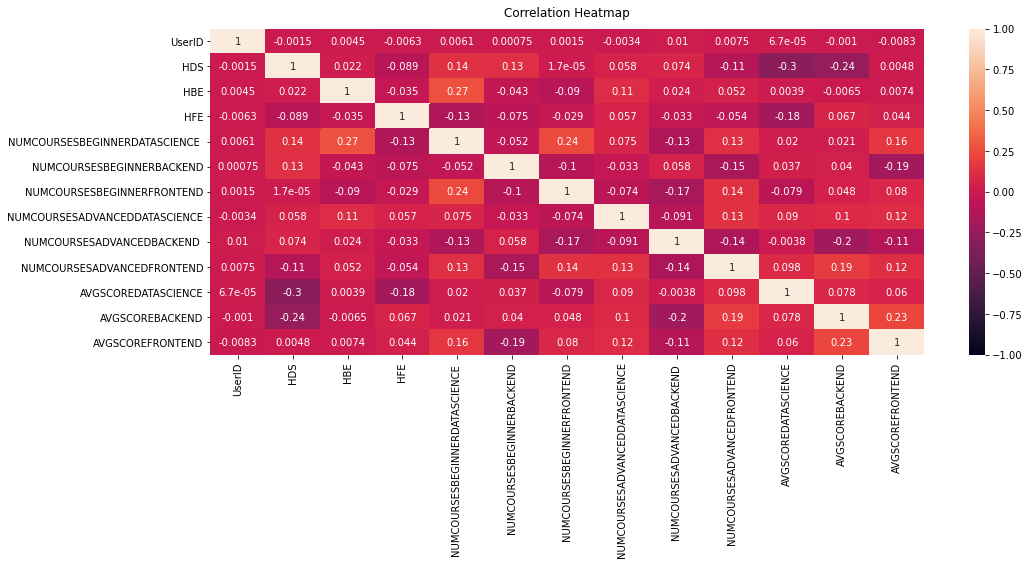

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(student_profile.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the result of the heatmap, there is some attributes that has a slightly significant correlation with each other. That is `AVGSCOREDATASCIENCE` with `HDS`, `NUMCOURSESDATASCIENCE` with `HBE` and also `AVGSCOREBACKEND` with `NUMCOURSESADVANCEDBACKEND`. Theoritically, `NUMCOURSEDATASCIENCE` with `HBE` shouldn't have a slightly significant correlation since they both are referring to different things. The other two makes sense since they are connected with each other but both correlations has negative value.<bs>
    
The thing is the correlations are not that high to call the attributes correlated. We will look more into this case later on. Let's look at the graphs for the 3 courses which are Data Science, Web (Front End), and Web (Back End).

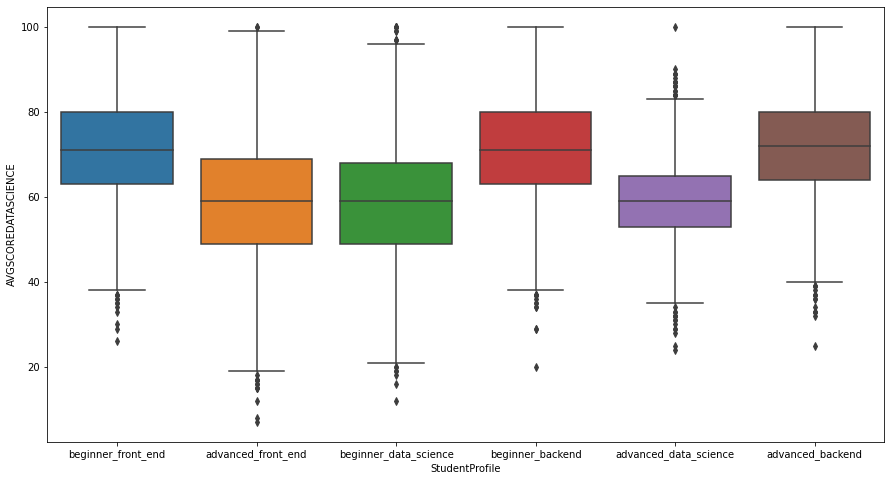

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(y="AVGSCOREDATASCIENCE", x="StudentProfile", data=student_profile)

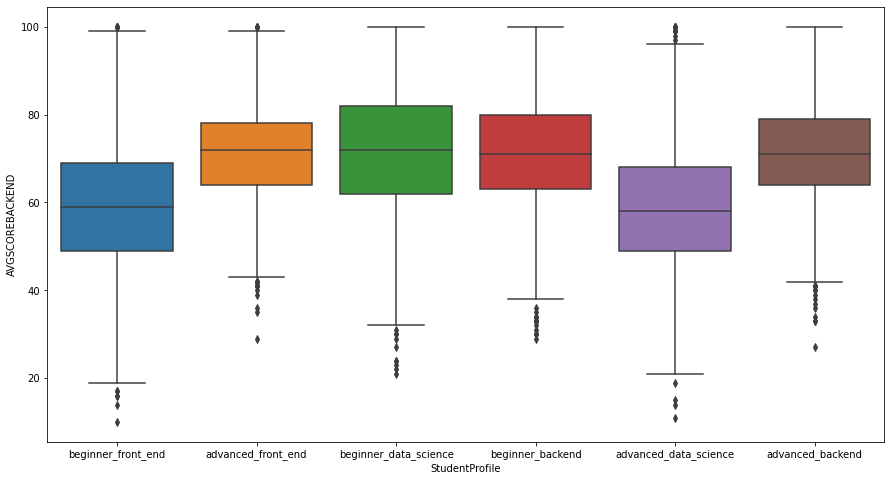

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(y="AVGSCOREBACKEND", x="StudentProfile", data=student_profile)

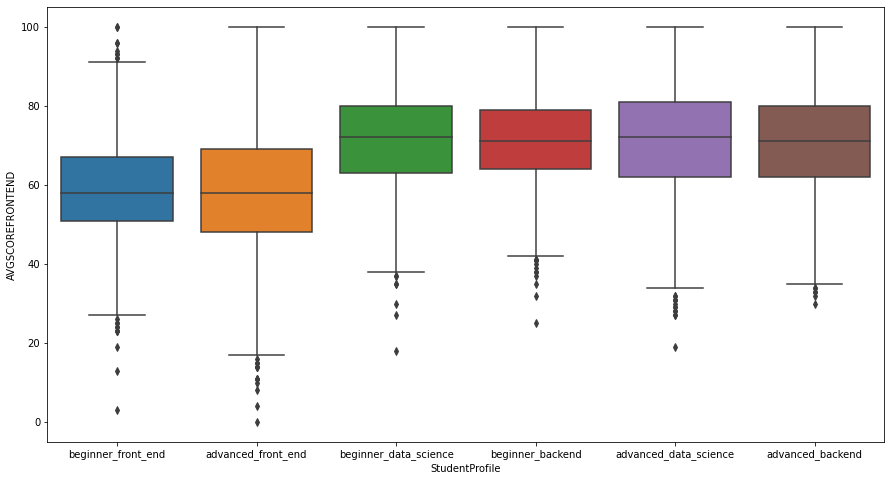

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(y="AVGSCOREFRONTEND", x="StudentProfile", data=student_profile)

We have seen the boxplots between the student profile and average of each course. The boxplots tells us that the tech profile of the students doesn't mean that they have high average scores for the profile they're given. Now let's see the correlation between number of courses with the average score.

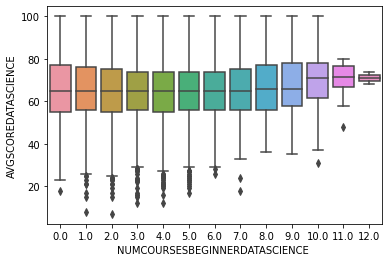

In [20]:
sns.boxplot(student_profile['NUMCOURSESBEGINNERDATASCIENCE '], student_profile['AVGSCOREDATASCIENCE'])

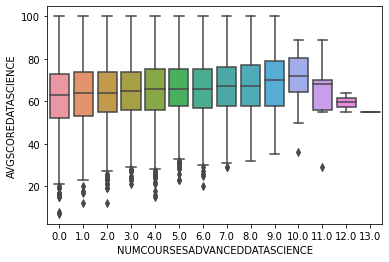

In [21]:
sns.boxplot(student_profile['NUMCOURSESADVANCEDDATASCIENCE'], student_profile['AVGSCOREDATASCIENCE'])

Text(0, 0.5, 'Average Data Science Score')

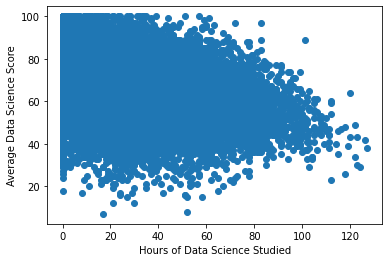

In [22]:
plt.scatter(student_profile['HDS'], student_profile['AVGSCOREDATASCIENCE'])
plt.xlabel("Hours of Data Science Studied")
plt.ylabel("Average Data Science Score")

We can interpret these as increasing number of beginner data science courses will slightly increase the average data science score. In the other hand, taking more advanced data science courses doesn't guarantee a higher average data science score. The scatterplot between the hours of data science studied and the average data science score shows that the attributes doesn't have much strength because it is widely spread.

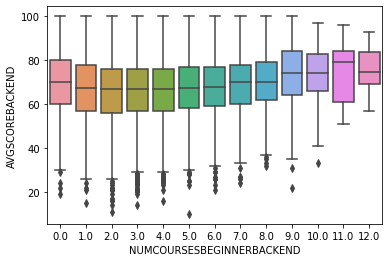

In [23]:
sns.boxplot(student_profile['NUMCOURSESBEGINNERBACKEND'], student_profile['AVGSCOREBACKEND'])

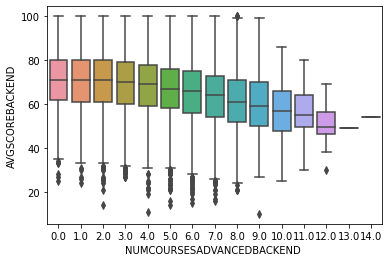

In [24]:
sns.boxplot(student_profile['NUMCOURSESADVANCEDBACKEND '], student_profile['AVGSCOREBACKEND'])

Text(0, 0.5, 'Average Web Back End Score')

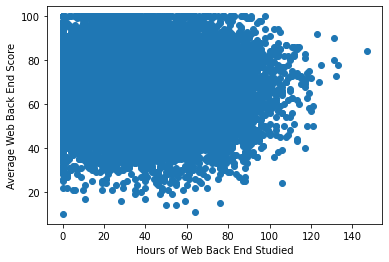

In [25]:
plt.scatter(student_profile['HBE'], student_profile['AVGSCOREBACKEND'])
plt.xlabel("Hours of Web Back End Studied")
plt.ylabel("Average Web Back End Score")

The boxplot between number of beginner web back end courses and average score of web back end courses doesn't really tell us anything because it doesn't have a certain direction. In the other hand, the average web back end score will get lower if we take more advanced web back end courses. The scatterplot between the hours of web back end studied and the average web back end score shows that the attributes doesn't have much strength because it is widely spread.

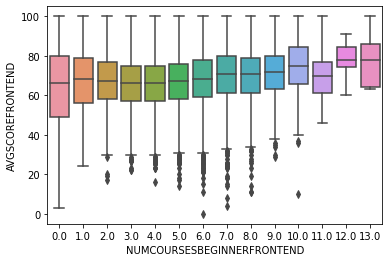

In [26]:
sns.boxplot(student_profile['NUMCOURSESBEGINNERFRONTEND'], student_profile['AVGSCOREFRONTEND'])

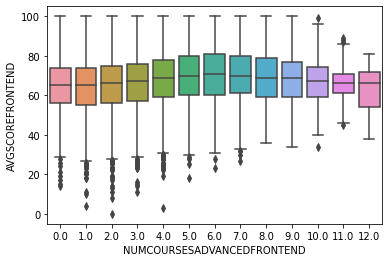

In [27]:
sns.boxplot(student_profile['NUMCOURSESADVANCEDFRONTEND'], student_profile['AVGSCOREFRONTEND'])

Text(0, 0.5, 'Average Web Front End Score')

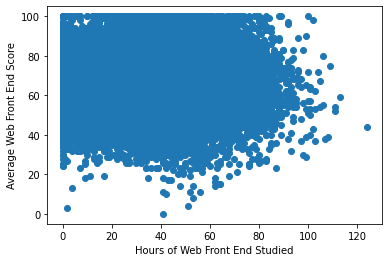

In [28]:
plt.scatter(student_profile['HFE'], student_profile['AVGSCOREFRONTEND'])
plt.xlabel("Hours of Web Front End Studied")
plt.ylabel("Average Web Front End Score")

The boxplot between number of beginner web front end courses and average score of web front end courses have a slight increase in average score with more number of courses. In the other hand, the second one has the highest average score at the middle and lowest at front and back. The scatterplot between the hours of web front end studied and the average web front end score shows that the attributes doesn't have much strength because it is widely spread.

### (15% of points) - 4. Data Preparation 

##### Prepare your data for machine learning and explain the outputs

We have gotten the percentage of missing values from exploring our dataset before, therefore we know that the amount of missing values is quite a lot. So, dropping the missing values would not be a wise choice. Instead, we fill the missing values with the median.

In [29]:
student_profile['HDS'] = student_profile['HDS'].fillna(student_profile['HDS'].median())
student_profile['HBE'] = student_profile['HBE'].fillna(student_profile['HBE'].median())
student_profile['HFE'] = student_profile['HFE'].fillna(student_profile['HFE'].median())
student_profile['NUMCOURSESBEGINNERDATASCIENCE '] = student_profile['NUMCOURSESBEGINNERDATASCIENCE '].fillna(student_profile['NUMCOURSESBEGINNERDATASCIENCE '].median())
student_profile['NUMCOURSESBEGINNERBACKEND'] = student_profile['NUMCOURSESBEGINNERBACKEND'].fillna(student_profile['NUMCOURSESBEGINNERBACKEND'].median())
student_profile['NUMCOURSESBEGINNERFRONTEND'] = student_profile['NUMCOURSESBEGINNERFRONTEND'].fillna(student_profile['NUMCOURSESBEGINNERFRONTEND'].median())
student_profile['NUMCOURSESADVANCEDDATASCIENCE'] = student_profile['NUMCOURSESADVANCEDDATASCIENCE'].fillna(student_profile['NUMCOURSESADVANCEDDATASCIENCE'].median())
student_profile['NUMCOURSESADVANCEDBACKEND '] = student_profile['NUMCOURSESADVANCEDBACKEND '].fillna(student_profile['NUMCOURSESADVANCEDBACKEND '].median())
student_profile['NUMCOURSESADVANCEDFRONTEND'] = student_profile['NUMCOURSESADVANCEDFRONTEND'].fillna(student_profile['NUMCOURSESADVANCEDFRONTEND'].median())
student_profile['AVGSCOREDATASCIENCE'] = student_profile['AVGSCOREDATASCIENCE'].fillna(student_profile['AVGSCOREDATASCIENCE'].median())
student_profile['AVGSCOREBACKEND'] = student_profile['AVGSCOREBACKEND'].fillna(student_profile['AVGSCOREBACKEND'].median())
student_profile['AVGSCOREFRONTEND'] = student_profile['AVGSCOREFRONTEND'].fillna(student_profile['AVGSCOREFRONTEND'].median())
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UserID                          20000 non-null  int64  
 1   HDS                             20000 non-null  float64
 2   HBE                             20000 non-null  float64
 3   HFE                             20000 non-null  float64
 4   NUMCOURSESBEGINNERDATASCIENCE   20000 non-null  float64
 5   NUMCOURSESBEGINNERBACKEND       20000 non-null  float64
 6   NUMCOURSESBEGINNERFRONTEND      20000 non-null  float64
 7   NUMCOURSESADVANCEDDATASCIENCE   20000 non-null  float64
 8   NUMCOURSESADVANCEDBACKEND       20000 non-null  float64
 9   NUMCOURSESADVANCEDFRONTEND      20000 non-null  float64
 10  AVGSCOREDATASCIENCE             20000 non-null  float64
 11  AVGSCOREBACKEND                 20000 non-null  float64
 12  AVGSCOREFRONTEND                

We also want to check whether there are duplicated values in the dataset.

In [30]:
student_profile[student_profile.duplicated(keep=False)]

,UserID,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND,StudentProfile


There are no duplicated values, so we can move on. We can now clean up the outliers because we saw that there were a lot of outliers from the plots above. But we decided not to do anything with the outliers since there were a lot. We will now determine the sample size with 95% confidence level, which is 377.

In [31]:
sp_sample = student_profile.sample(n=377, random_state=42)
sp_sample.shape

(377, 14)

We then define the X and Y variables, then split the dataset into training and testing sets with ratio 70% and 30%.

In [32]:
X = sp_sample[['HDS','HBE','HFE','NUMCOURSESBEGINNERDATASCIENCE ', 'NUMCOURSESBEGINNERBACKEND', 'NUMCOURSESBEGINNERFRONTEND',
               'NUMCOURSESADVANCEDDATASCIENCE', 'NUMCOURSESADVANCEDBACKEND ', 'NUMCOURSESADVANCEDFRONTEND', 'AVGSCOREDATASCIENCE',
               'AVGSCOREBACKEND','AVGSCOREFRONTEND']]
y = sp_sample['StudentProfile']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((263, 12), (263,), (114, 12), (114,))

###  (35% of points) - 5. Shortlist promising models

**Now, you can train your models, evaluate the models, and compare their performances by displaying the performance metrics for each models.**   
***`You will get 10 extra points if you correctly compare your model using standard parameters against hyperparameters and provide a clear explanation.`***

### Random Forest

In [34]:
# Random Forest
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train,y_train)
print('Random Forest Accuracy:', model_rfc.score(X_test,y_test))

Random Forest Accuracy: 0.7017543859649122


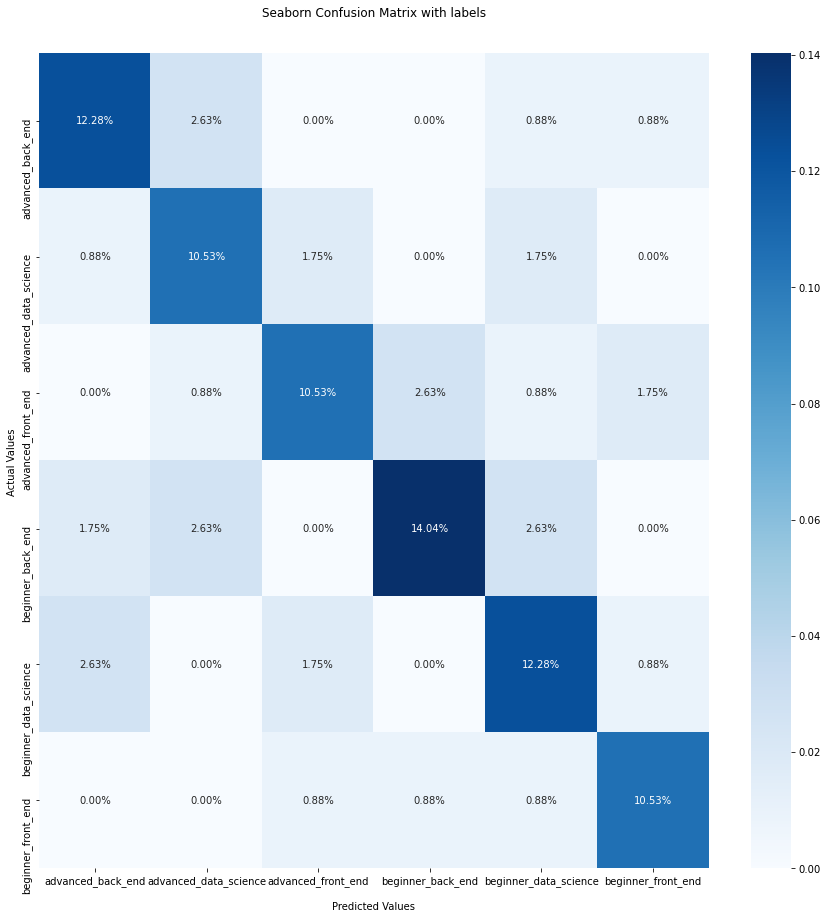

In [35]:
rfc_pred = model_rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])
ax.yaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])

plt.show()

From the result, we can see that Random Forest has an accuracy around 70,2% using standard parameters and we also can see the percentage of correct predicted per category in the confusion matrix. We can get even better performance if we use the best hyperparameter values. We can find the best hyperparamters using GridSearchCV.

In [36]:
grid_params = {'n_estimators': list(range(1,220, 20)),
               'max_depth': list(range(1,220, 20))}

In [37]:
rf_random = GridSearchCV(RandomForestClassifier(random_state=42), param_grid = grid_params, 
                          cv = 10, n_jobs = -1, verbose = 10)

Grid Search will evaluate the model 1210 times with different hyperparameters because the class validation is set by 10. We can now fit the model into our training set and find the best score, plus the best hyperparameters from the best score.

In [38]:
rf_res = rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [39]:
rf_res.best_score_

0.7678062678062678

In [40]:
rf_res.best_params_

{'max_depth': 21, 'n_estimators': 141}

With the best hyperparameters found, we can use them to the Random Forest Classifier again.

In [41]:
model_rfc = RandomForestClassifier(max_depth= 21, n_estimators=141, random_state=42)
model_rfc.fit(X_train,y_train)
print('Random Forest Accuracy:', model_rfc.score(X_test,y_test))

Random Forest Accuracy: 0.7280701754385965


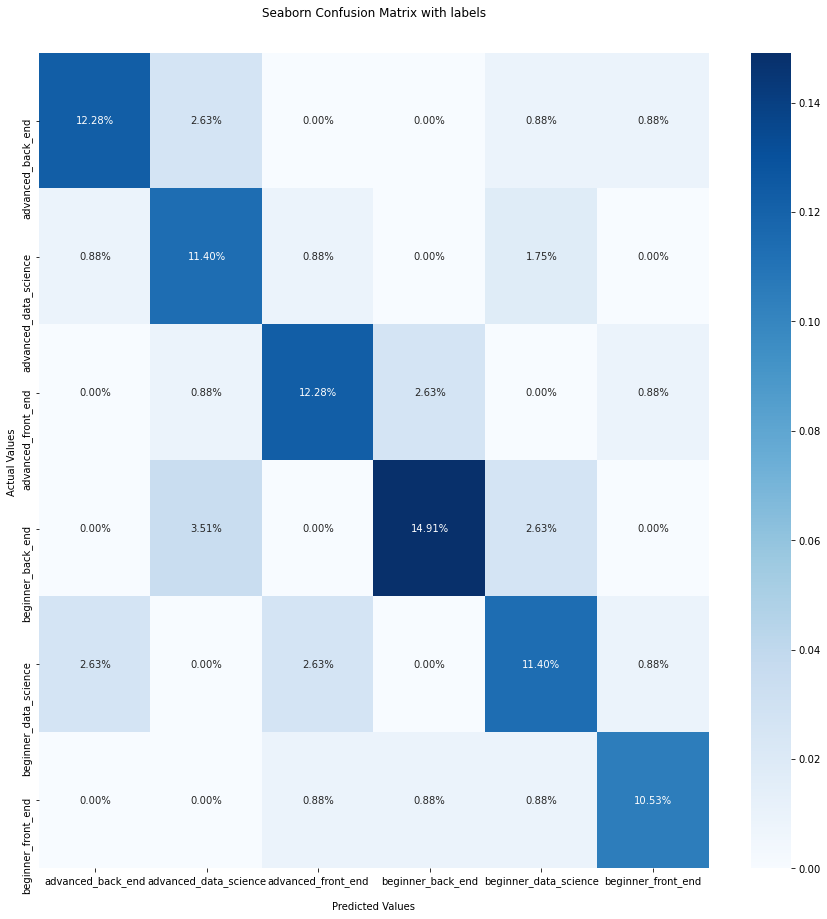

In [42]:
rfc_pred = model_rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])
ax.yaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])

plt.show()

The accuracy was increased around 2% by using the best hyperparameters. It is possible to be higher with more parameters.

### K Nearest Neighbors

In [43]:
# K Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
print('K Nearest Neighbors Accuracy:', model_knn.score(X_test,y_test))

K Nearest Neighbors Accuracy: 0.5614035087719298


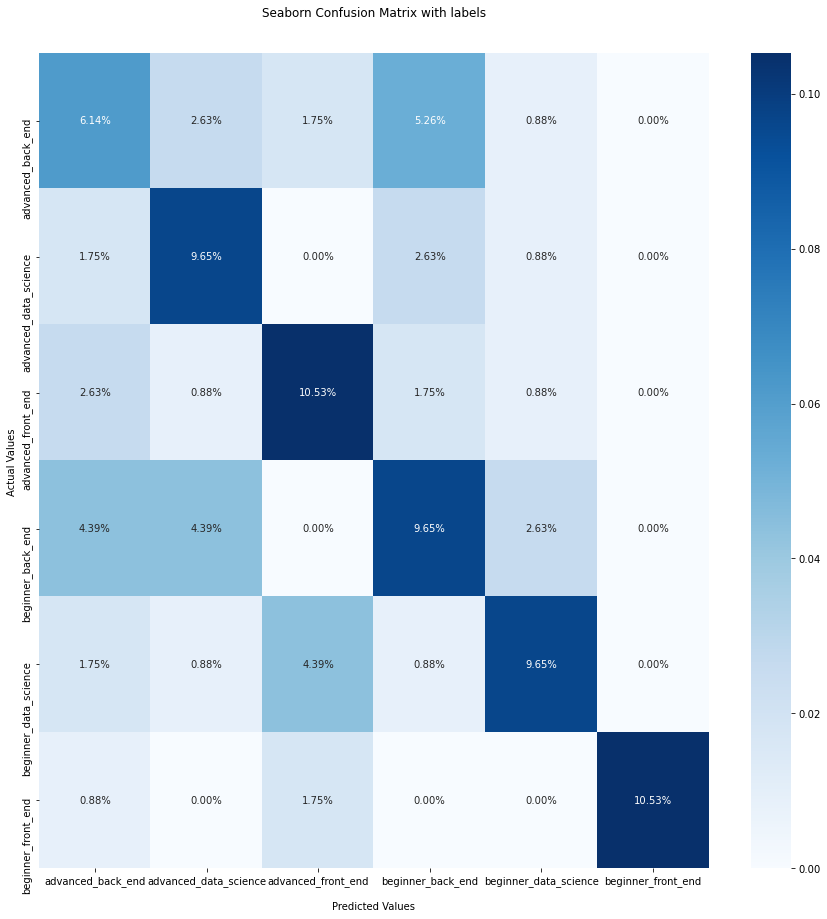

In [44]:
knn_pred = model_knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])
ax.yaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])

plt.show()

From the result, we can see that K Nearest Neighbour has an accuracy around 56.14% using standard parameters and we also can see the percentage of correct predicted per category in the confusion matrix. We can get even better performance if we use the best hyperparameter values. We will use three hyperparamters - n-neighbors, weights and metric using GridSearchCV.

In [45]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [46]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

Grid Search will evaluate the model 108 times with different hyperparameters because the class validation is set by 3. We can now fit the model into our training set and find the best score, plus the best hyperparameters from the best score.

In [47]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  93 out of 108 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.5s finished


In [48]:
g_res.best_score_

0.7072013235806339

In [49]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

With the best hyperparameters found, we can use them to the KNN Classifier again.

In [50]:
model_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', metric = 'manhattan')
model_knn.fit(X_train,y_train)
print('K Nearest Neighbors Accuracy:', model_knn.score(X_test,y_test))

K Nearest Neighbors Accuracy: 0.6666666666666666


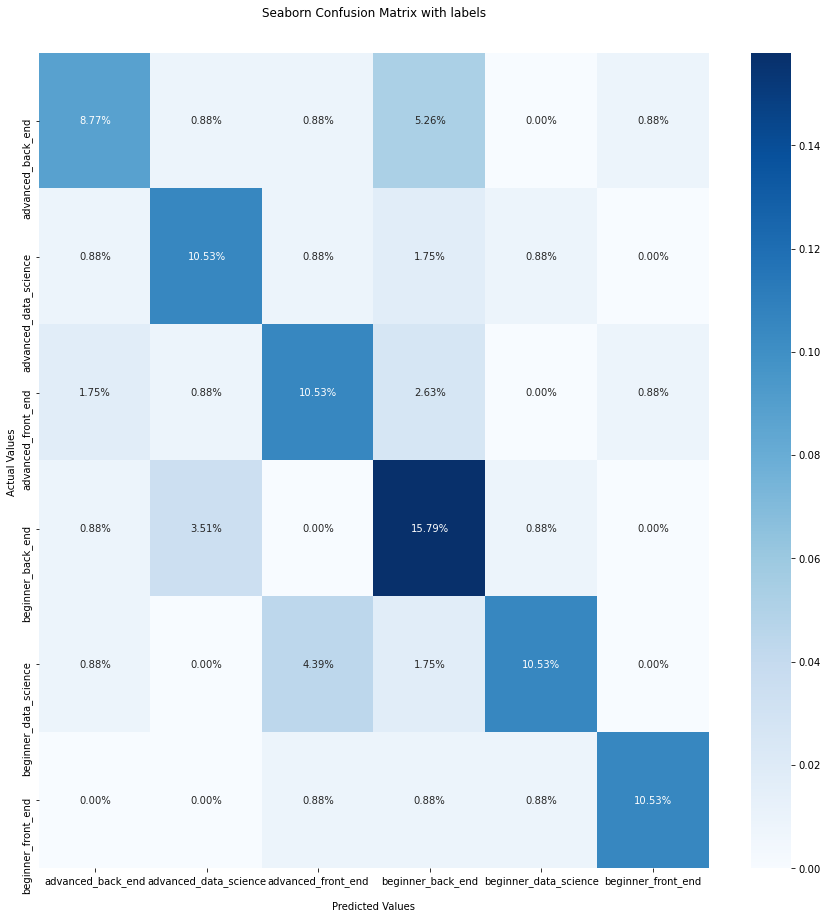

In [51]:
knn_pred = model_knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])
ax.yaxis.set_ticklabels(['advanced_back_end','advanced_data_science','advanced_front_end','beginner_back_end','beginner_data_science','beginner_front_end'])

plt.show()

The accuracy was increased around 10% by using the best hyperparameters. It is possible to be higher with more parameters.

### (3% of points) - 6. Select Your Final Model 

#### You finally have your final model. Write comments to justify your final model

In [52]:
print('Random Forest Accuracy:', model_rfc.score(X_test,y_test))
print('K Nearest Neighbors Accuracy:', model_knn.score(X_test,y_test))
max(model_rfc.score(X_test,y_test), model_knn.score(X_test,y_test))

Random Forest Accuracy: 0.7280701754385965
K Nearest Neighbors Accuracy: 0.6666666666666666


0.7280701754385965

Since Random Forest Classifier has the higher accuracy than K Nearest Neighbors, we will select Random Forest as our final model with an accuracy around 72,8%.

***Verified by,***
   
[Noviyanti TM Sagala] (D6464) and sent to Department/Program on 04 04, 2022    
